# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [4]:
# iterate through all folders, load each image

trainAmt = 0.9
allFaces = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        imgPath = os.path.join("ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        allFaces.append(img)
        labels.append(i)

# shuffle
randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

# split
trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)): ]
testLabels = labels[int(trainAmt*len(allFaces)): ]

# 112x92 (= 10304) grayscale images,  360 in train, 40 in test
print(trainFaces.shape, trainLabels.shape)

(360, 112, 92) (360,)


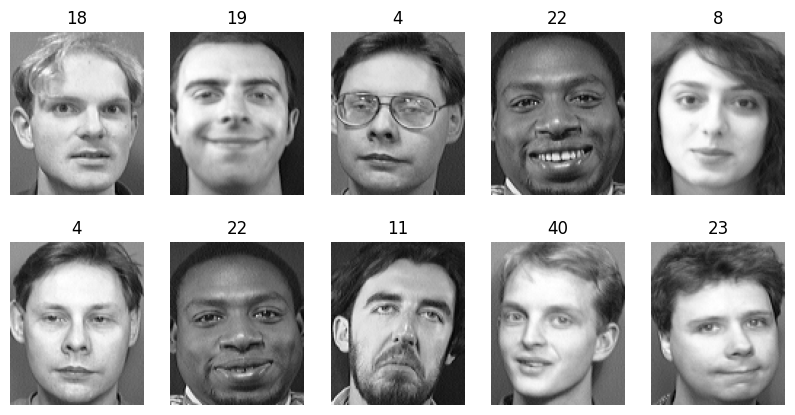

In [5]:
# lets visualize some of the images
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(trainFaces[i*5+j], cmap="gray")
        ax[i, j].axis("off")
        ax[i, j].set_title(trainLabels[i*5+j])
plt.show()

trainfaces are basically total 360 images each of size 112*92. TrainLabels correspond to the labels of the images.

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [17]:
def principalComponentAnalysis(X, numComponents):
    """
    Implement pca in the following function by taking the following arguements:
    1. X(images array)
    2. number of components
    The function must return the eigen vectors (principal components) also termed "Eigen faces"
    """

    # flatten each of the image into 1d array
    flattened_images = X.reshape(X.shape[0], -1)
    print(flattened_images.shape)  # this would be 360*10304

    # Compute the mean face
    mean_face = np.mean(flattened_images, axis=0)
    print(mean_face.shape)  # this would be 10304

    # visualize the mean face
    plt.imshow(mean_face.reshape(X[0].shape), cmap="gray")

    # bascailly for from each row of teh flattened_images, subtract the mean_face
    centered_images = flattened_images - mean_face
    # Compute the covariance matrix

    S= np.dot(centered_images.T, centered_images)
    print(S.shape)
    
    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(S)
    print(eigenvalues.shape)  # this would be 10304
    print(eigenvectors.shape)  # this would be 10304*10304

    # # Sort eigenvectors in descending order based on eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]

    # # Select the first numComponents eigenvectors
    principal_components = eigenvectors[:, :numComponents]
    print(principal_components.shape)  # this would be 10304*numCompon`ents

    return principal_components, centered_images

(360, 10304)
(10304,)
(10304, 10304)
(10304,)
(10304, 10304)
(10304, 10)


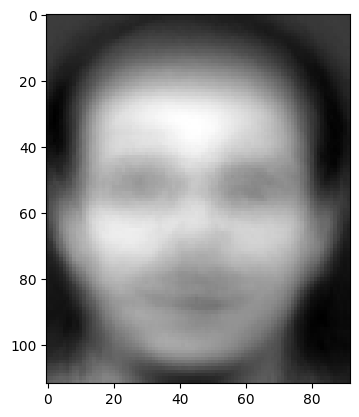

In [18]:
numComponents = 10
eigen_faces,centered_images=principalComponentAnalysis(trainFaces, numComponents=numComponents)




In [ ]:
reshaped_eigen_faces = eigen_faces.reshape(numComponents, 112, 92)

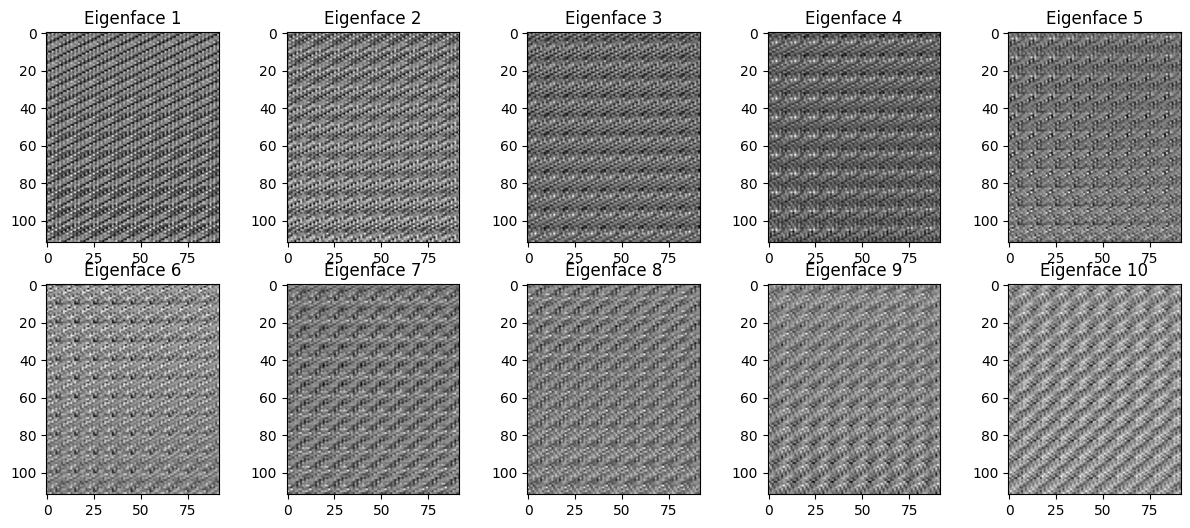

In [ ]:
# Visualize the eigenfaces directly
num_rows = 2  # Adjust as needed
num_cols = 5  # Adjust as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))

for i in range(numComponents):
    ax = axes[i // num_cols, i % num_cols]
    eigenface = np.dot(centered_images, eigenvectors[:, i]).reshape(X[0].shape)
    ax.imshow(eigenface, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Eigenface {i + 1}')

plt.show()


#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [ ]:
def imageReconstruction(testFace, eigenFaces, meanFace):
    """
    Helper function to reconstruct images
    """
  
    # your code here

    return None

In [ ]:
# plot recontructions here
%matplotlib inline

#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

In [ ]:
%matplotlib inline

def displayNfactors():

    # your code here

    return None

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [ ]:
def getClass():
    """
    Arguments:
    1. Test image
    2. Eigenvectors
    3. Mean Eigen Face
    4. Training Set(X_train,y_train)

    The function must return the following:
    1. image with smallest error
    2. error value
    3. prediction class
    """

    # your code here

    return None

Iterate through all the images in the test data and test the accuracy by taking different number of components

In [ ]:
components = [3,5,10,20,30,40,50]
mse = []

for numComponents in components:
    # your code here

Plot Number of eigenvectors vs Mean Square Error

In [ ]:
# your code here

Plot Number of eigenvectors vs Logarithmic Mean Square Error

In [ ]:
# your code here